In [1]:
#Importing Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)
#Importing Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split;
#importing matrix for regression model
from sklearn.metrics import accuracy_score,confusion_matrix


In [2]:
# importing dataset using pandas function
df = pd.read_csv('bank.csv',sep = ';')
df.sample(frac=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
558,41,blue-collar,married,secondary,yes,720,no,yes,cellular,24,jul,651,1,-1,0,unknown,yes
1081,48,admin.,married,secondary,no,112,no,no,cellular,18,aug,139,5,-1,0,unknown,no
2942,34,technician,married,tertiary,no,544,yes,yes,cellular,18,nov,58,2,-1,0,unknown,no
1568,42,technician,single,secondary,no,0,yes,no,unknown,7,may,275,4,-1,0,unknown,no
3988,57,admin.,married,secondary,no,-967,yes,no,telephone,15,may,8,7,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,41,blue-collar,married,secondary,no,4900,yes,no,telephone,31,jul,121,2,-1,0,unknown,no
3087,28,management,single,tertiary,no,224,yes,no,cellular,2,feb,97,3,-1,0,unknown,no
3171,28,blue-collar,single,primary,no,1199,yes,no,cellular,30,jul,1011,20,-1,0,unknown,no
1759,26,admin.,single,tertiary,no,3672,yes,no,unknown,29,may,360,5,-1,0,unknown,no


In [3]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
#evaluate descriptive stats : EDA
#step 1 : Segregate Categorical columns nad numerical columns
categorical_col = df.select_dtypes(include='object')
numerical_col = df.select_dtypes(exclude='object')

In [5]:
from collections import OrderedDict

stats=[]
for col in numerical_col.columns:
  numerical_stats = OrderedDict({
      'feature':col,
      'mean':df[col].mean(),
      'median':df[col].quantile(0.50),
      'mode':df[col].mode()[0],
      'min':df[col].min(),
      'max':df[col].max(),
      'std':df[col].std(),
      'var':df[col].var(),
      'skew':df[col].skew(),
      'kurt':df[col].kurtosis(),
      'iqr':df[col].quantile(0.75)-df[col].quantile(0.25),
      'q1': df[col].quantile(0.25),
      'q3': df[col].quantile(0.75),
  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report



,feature,mean,median,mode,min,max,std,var,skew,kurt,iqr,q1,q3
0,age,41.170095,39.0,34,19,87,10.576211,1.118562e+02,0.699501,0.348775,16.0,33.0,49.0
1,balance,1422.657819,444.0,0,-3313,71188,3009.638142,9.057922e+06,6.596431,88.390332,1411.0,69.0,1480.0
2,day,15.915284,16.0,20,1,31,8.247667,6.802402e+01,0.094627,-1.039531,12.0,9.0,21.0
3,duration,263.961292,185.0,123,4,3025,259.856633,6.752547e+04,2.772420,12.530050,225.0,104.0,329.0
4,campaign,2.793630,2.0,1,1,50,3.109807,9.670897e+00,4.743914,37.168920,2.0,1.0,3.0
5,pdays,39.766645,-1.0,-1,-1,871,100.121124,1.002424e+04,2.717071,7.957128,0.0,-1.0,-1.0
6,previous,0.542579,0.0,0,0,25,1.693562,2.868153e+00,5.875259,51.995212,0.0,0.0,0.0


In [6]:
'''when your evaluating descriptive statistics make sure that IQR of any column cannot be 0 such column cannot contribute in machine learning model  '''

'when your evaluating descriptive statistics make sure that IQR of any column cannot be 0 such column cannot contribute in machine learning model  '

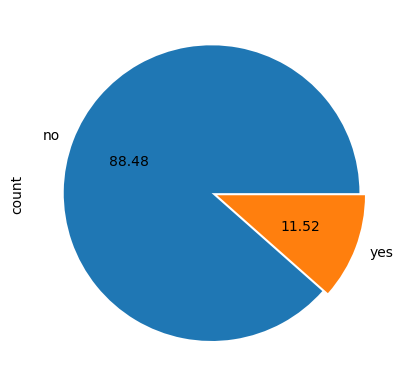

In [7]:
# Problem Definition:
'''
The Dataset Consist  of 4521 row and 17 columns . This dataset belong to
portugal b ank where our aim is to classify whether the customer will subscribe
the bank term deposite or not :

Type of machine learning model: Binary Classification

Above Dataset is a type of Multivariate Analysis

X: Independent column
y: Target Column / Dpendent column

Here, y acts as Target Column / Dependent Column.
'''

#Checking the DIstrubution of pepole  who subscribe the term deposite
''' Based on distrubution of Target column we found that the data is imbalance.'''
df['y'].value_counts().plot(kind='pie', autopct = '%1.2f',explode = [0.02,0.02])
plt.show()

In [8]:
# Data Insight
'''
1. 88.48% pepole are not subscribe bank term deposite.
2. The Average Call Durarion Recorded is 264 seconds . This can be one of the cause
   for the pepole who have not subscribe the bank term deposite.
3. if call duration is more than 300 seconds the chances are there that
   person will subscribe the bank term deposite.
4. Target Audiance is Divoresed pepole.
5. Pepole who have taken loan are esxcluded from bank term deposite


'''
df['duration'].mean()

263.96129174961294

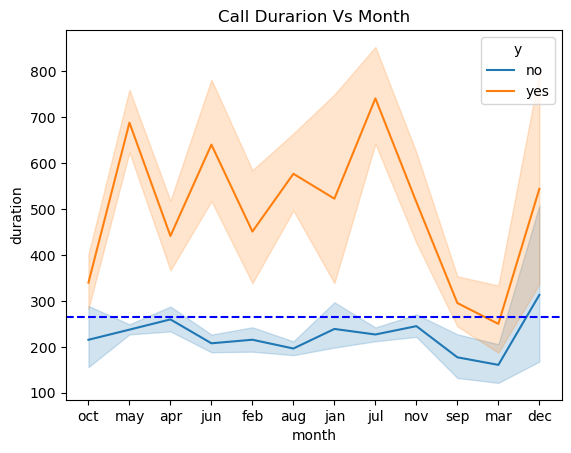

In [9]:
sns.lineplot(x = df['month'], y = df['duration'],hue=df['y'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.title('Call Durarion Vs Month')
plt.show()

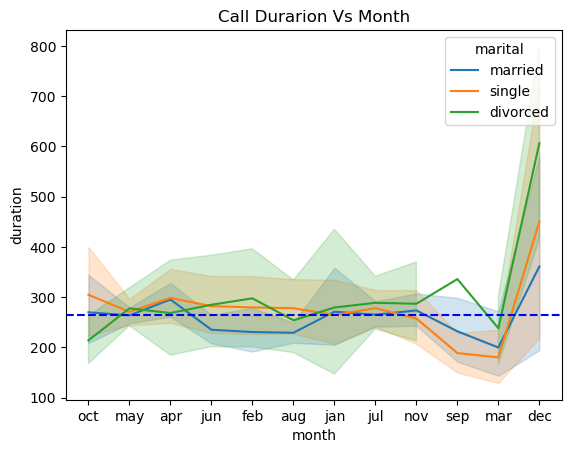

In [10]:
sns.lineplot(x = df['month'], y = df['duration'],hue=df['marital'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.title('Call Durarion Vs Month')
plt.show()

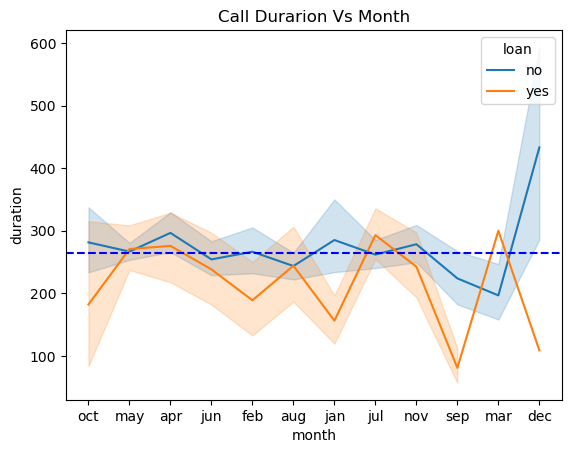

In [11]:
sns.lineplot(x = df['month'], y = df['duration'],hue=df['loan'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.title('Call Durarion Vs Month')
plt.show()

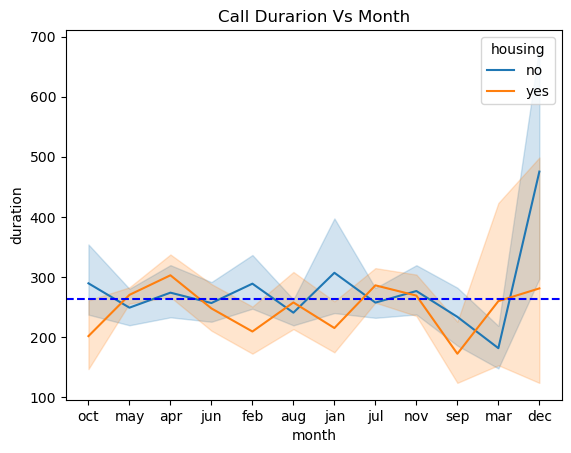

In [12]:
sns.lineplot(x = df['month'], y = df['duration'],hue=df['housing'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.title('Call Durarion Vs Month')
plt.show()

<Axes: ylabel='count'>

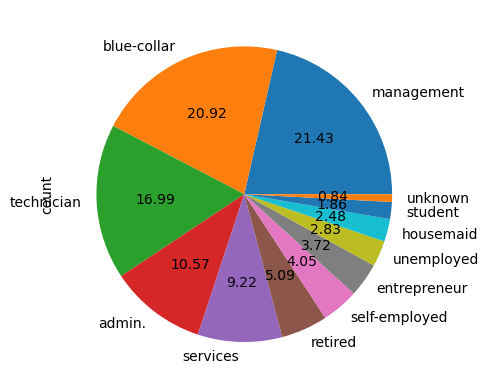

In [13]:
df['job'].value_counts().plot(kind='pie', autopct = '%1.2f')

In [14]:
management = df[df['job']=='management']
bluecollar = df[df['job']=='blue-collar']
technician = df[df['job']=='technician']
admin = df[df['job']=='admin.']

<Axes: ylabel='count'>

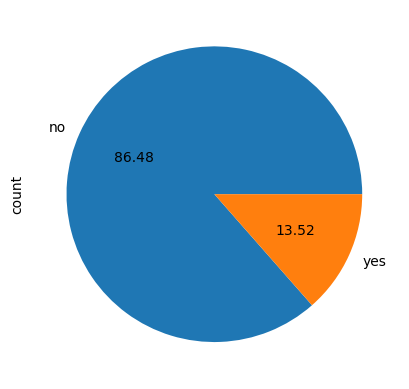

In [15]:
management['y'].value_counts().plot(kind='pie', autopct = '%1.2f')

<Axes: ylabel='balance'>

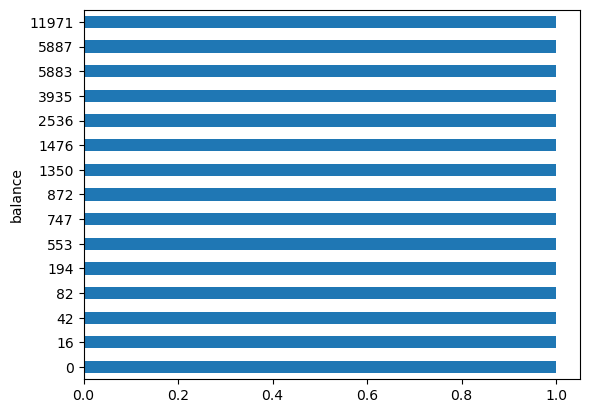

In [17]:
management['balance'][:15].sort_values(ascending=True).value_counts().plot(kind = 'barh')


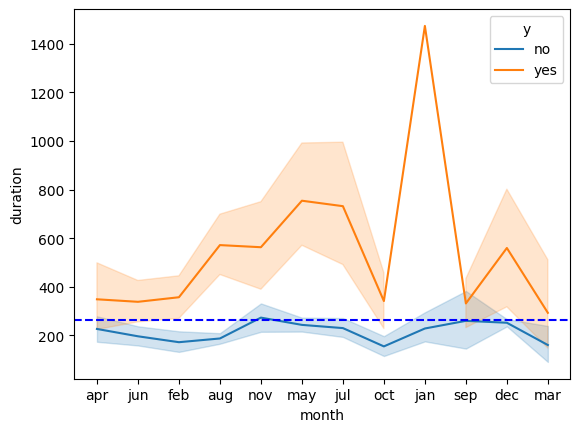

In [ ]:
sns.lineplot(x =management['month'] , y = management['duration'],hue  = management['y'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.show()

<Axes: ylabel='count'>

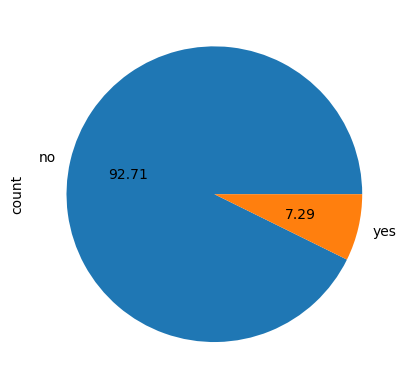

In [18]:
bluecollar['y'].value_counts().plot(kind='pie', autopct = '%1.2f')

<Axes: ylabel='balance'>

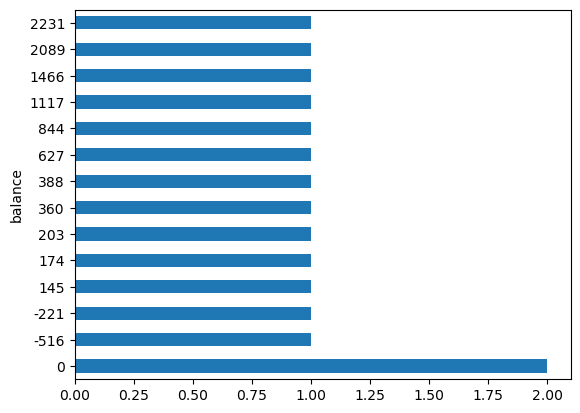

In [19]:
bluecollar['balance'][:15].sort_values(ascending=True).value_counts().plot(kind = 'barh')

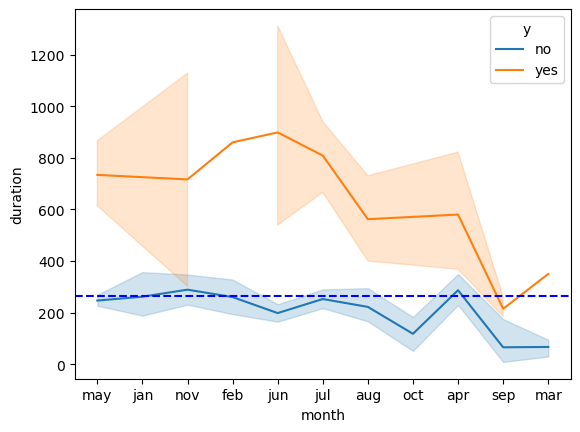

In [20]:
sns.lineplot(x =bluecollar['month'] , y = bluecollar['duration'],hue  = bluecollar['y'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.show()

<Axes: ylabel='count'>

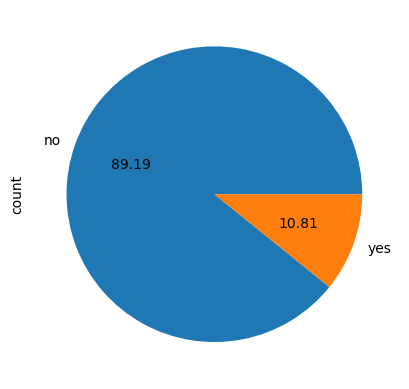

In [21]:
technician['y'].value_counts().plot(kind='pie', autopct = '%1.2f')

<Axes: ylabel='balance'>

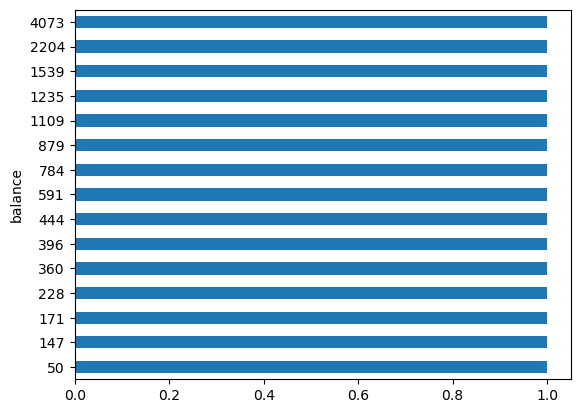

In [22]:
technician['balance'][:15].sort_values(ascending=True).value_counts().plot(kind = 'barh')

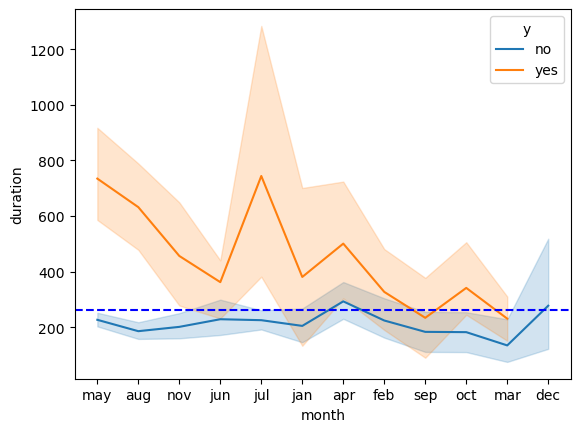

In [23]:
sns.lineplot(x =technician['month'] , y = technician['duration'],hue  = technician['y'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.show()

<Axes: ylabel='count'>

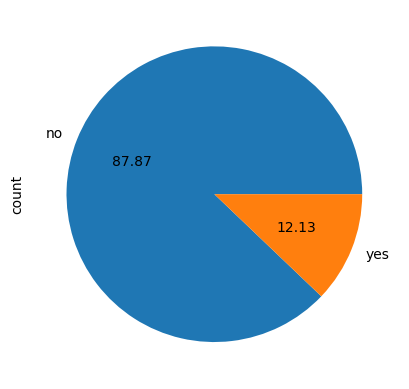

In [24]:
admin['y'].value_counts().plot(kind='pie', autopct = '%1.2f')

<Axes: ylabel='balance'>

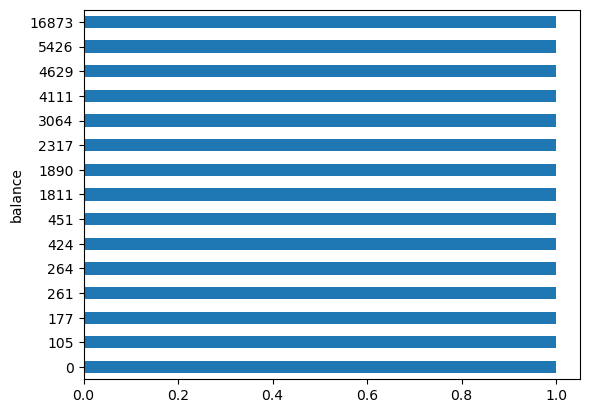

In [25]:
admin['balance'][:15].sort_values(ascending=True).value_counts().plot(kind = 'barh')

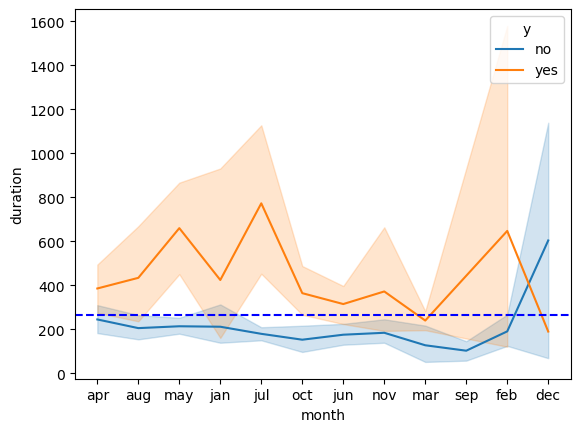

In [26]:
sns.lineplot(x =admin['month'] , y = admin['duration'],hue  = admin['y'])
plt.axhline(y=df['duration'].mean(), color='b', linestyle='--')
plt.show()